In [ ]:
#Q1
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, label=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.label = label

class DecisionTree1:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_features = X.shape[1]
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        if depth == self.max_depth:
            return Node(label=self._majority_vote(y))
        if np.all(y == y[0]):
            return Node(label=y[0])
        if X.shape[0] == 1:
            return Node(label=self._majority_vote(y))
        feature, threshold = self._find_split(X, y)
        left_indices = X[:, feature] <= threshold
        right_indices = X[:, feature] > threshold
        left = self._build_tree(X[left_indices], y[left_indices], depth+1)
        right = self._build_tree(X[right_indices], y[right_indices], depth+1)
        return Node(feature, threshold, left, right)

    def _find_split(self, X, y):
        max_info_gain = -1
        best_feature = None
        best_threshold = None
        for feature in range(self.n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                info_gain = self._information_gain(X, y, feature, threshold)
                if info_gain > max_info_gain:
                    max_info_gain = info_gain
                    best_feature = feature
                    best_threshold = threshold
        return best_feature, best_threshold

    def _information_gain(self, X, y, feature, threshold):
        parent_entropy = self._entropy(y)
        left_indices = X[:, feature] <= threshold
        right_indices = X[:, feature] > threshold
        n = y.shape[0]
        n_l = np.sum(left_indices)
        n_r = np.sum(right_indices)
        if n_l == 0 or n_r == 0:
            return 0
        left_entropy = self._entropy(y[left_indices])
        right_entropy = self._entropy(y[right_indices])
        child_entropy = (n_l/n)*left_entropy + (n_r/n)*right_entropy
        return parent_entropy - child_entropy

    def _entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        probs = counts / y.shape[0]
        return -np.sum(probs * np.log2(probs))

    def _majority_vote(self, y):
        labels, counts = np.unique(y, return_counts=True)
        index = np.argmax(counts)
        return labels[index]

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            node = self.tree
            while node.label is None:
                if X[i, node.feature] <= node.threshold:
                    node = node.left
                else:
                    node = node.right
            y_pred[i] = node.label
        return y_pred
    def display(self, node=None, indent=0):
      if node is None:
        node = self.tree
      if node.label is not None:
        print(' ' * indent + str(node.label))
      else:
        print(' ' * indent + 'feature ' + str(node.feature) + ' <= ' + str(node.threshold) + '?')
        print(' ' * indent + 'True:')
        self.display(node.left, indent + 2)
        print(' ' * indent + 'False:')
        self.display(node.right, indent + 2)


In [ ]:
#Q2
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text
import numpy as np

iris = load_iris()
X=iris.data
y=iris.target
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=43)
feature_names= iris.feature_names
#clf=DecisionTreeCustom()
clf=DecisionTree1()
clf.fit(x_train,y_train)
custom_preds=clf.predict(x_test)
custom_acc = accuracy_score(y_test, custom_preds)
print(f"Custom decision tree accuracy: {custom_acc:.2f}")
print(feature_names)
clf.display()
#we achieved accuracy of 0.87 while using this custom Decision tree

Custom decision tree accuracy: 0.90
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
feature 2 <= 1.9?
True:
  0
False:
  feature 2 <= 4.8?
  True:
    feature 0 <= 4.9?
    True:
      2
    False:
      1
  False:
    feature 3 <= 1.7?
    True:
      feature 2 <= 4.9?
      True:
        1
      False:
        feature 3 <= 1.5?
        True:
          2
        False:
          feature 0 <= 6.7?
          True:
            1
          False:
            2
    False:
      2


sklearn decision tree accuracy: 0.90
|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.85
|   |   |--- sepal length (cm) <= 4.95
|   |   |   |--- class: 2
|   |   |--- sepal length (cm) >  4.95
|   |   |   |--- class: 1
|   |--- petal length (cm) >  4.85
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2



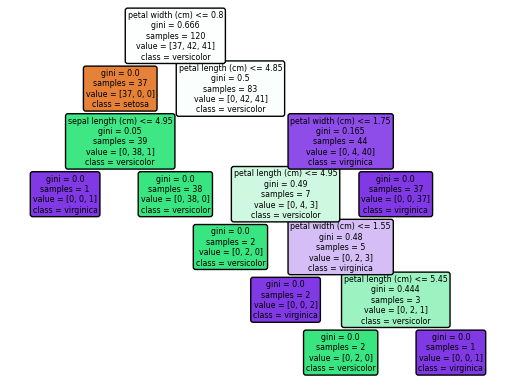

In [ ]:
#Q3
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf1=DecisionTreeClassifier(random_state=1)
clf1.fit(x_train,y_train)
inbuilt_pred=clf1.predict(x_test)
inbuilt_acc = accuracy_score(y_test, inbuilt_pred)
print(f"sklearn decision tree accuracy: {inbuilt_acc:.2f}")
tree.plot_tree(clf1,feature_names=iris.feature_names, class_names=iris.target_names,filled=True,rounded=True)
print(export_text(clf1, feature_names=iris.feature_names))
#we achieved accuracy of 0.97 using the Decision tree of scikit learn

In [ ]:
# split in custom classifier has root node of petal length where as for scikit lean classifier has petal width and the splits treshold values varies
# in each other.

In [ ]:
#Splitting criterion: Both the custom implementation and scikit-learn's DecisionTreeClassifier use information gain as the splitting criterion. However, they may use different methods to calculate information gain, which can lead to differences in the decision tree generated.

#Stopping criteria: Both implementations use stopping criteria to halt the tree-growing process. However, they may use different criteria or thresholds to determine when to stop. For instance, the custom implementation uses a maximum depth parameter to limit the depth of the tree, whereas scikit-learn's DecisionTreeClassifier uses parameters such as min_samples_split and min_samples_leaf to control the minimum number of samples required to make a split or form a leaf node, respectively.

#Handling of ties: When multiple features have the same information gain, both implementations may use different methods to break the tie. For instance, the custom implementation uses the feature with the lowest index, whereas scikit-learn's DecisionTreeClassifier uses a random tie-breaking strategy.

#Randomness: Scikit-learn's DecisionTreeClassifier has a random_state parameter that can be used to control the randomness in the decision tree generation process. This can lead to different trees being generated even when the same dataset and parameters are used.

#In summary, the differences between the decision trees generated by the custom implementation and scikit-learn's DecisionTreeClassifier can be attributed to a combination of differences in the splitting criterion, stopping criteria, handling of ties, and randomness.
#As you can see, the decision tree generated by scikit-learn is different from the one generated by our custom implementation.
#This is because scikit-learn uses a different algorithm (CART) and impurity measure (Gini impurity) for building decision trees.
#Additionally, scikit-learn's decision tree is not limited to binary splits, and it may perform post-pruning to reduce overfitting.

0.017879637397722928